<a href="https://colab.research.google.com/github/souchie1/novo/blob/main/Analise_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas Básicas e os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv')

In [3]:
dados

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dados.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dados.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
dados.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
289,15713912,Female,37,78000,1
268,15746203,Female,47,144000,1
236,15660541,Male,40,57000,0
365,15807525,Female,59,29000,1
238,15617877,Female,46,82000,0


In [7]:
dados.shape

(400, 5)

In [8]:
dados.duplicated().sum()

0

In [9]:
dados.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
dados.dtypes.value_counts()

int64     4
object    1
dtype: int64

In [12]:
# Mapeando os valores categóricos para valores numéricos
gender_mapping = {
    'Male': 0,
    'Female': 1,

}

dados['Gender'] = dados['Gender'].map(gender_mapping)

# Agora, a coluna "Gender" contém valores numéricos correspondentes

Neste exemplo acima , estamos usando um dicionário chamado gender_mapping para associar os valores categóricos da coluna "Gênero" aos valores numéricos correspondentes. Você pode ajustar o mapeamento de acordo com suas necessidades específicas.

In [13]:
dados.dtypes.value_counts()

int64    5
dtype: int64

In [14]:
dados

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


# Aplicando o Label Encoder na coluna Gender

Para quem tiver dificuldade de ler o código abaixo, olhar a Aula 1 - SVM onde é explicado todo o processo de transformar colunas categóricas em numéricas de forma automática (sem passar pela transformação 1 coluna de cada vez)

In [15]:
'''colunas = dados.dtypes.reset_index()

categ_cols = colunas[colunas[0] == 'object']['index'].to_list()


# Fazendo o Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



for i in categ_cols:
    le.fit(dados[i])
    dados[str(i) + '_encoded'] = le.transform(dados[i])'''



"colunas = dados.dtypes.reset_index()\n\ncateg_cols = colunas[colunas[0] == 'object']['index'].to_list()\n\n\n# Fazendo o Label Encoder\n\nfrom sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\n\n\nfor i in categ_cols:\n    le.fit(dados[i])\n    dados[str(i) + '_encoded'] = le.transform(dados[i])"

In [16]:
dados

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [17]:
dados = dados.drop('Gender', axis = 1)

# Quebrando a base em Treino e Teste

In [18]:
from sklearn.model_selection import train_test_split
x = dados.drop('Purchased', axis = 1)
y = dados['Purchased']
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size= 0.3, random_state=42)

# Carregando o Modelo

Na nossa base temos dados de clientes + a informação se ele comprou um anúncio oferecido em rede social ou não. Usaremos o Naive Bayes para fazer essa previsão

:## Treinando o modelo naive_bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

modelo.fit(x_train,y_train)


GaussianNB()

## Fazendo a Previsão

In [21]:
y_pred = modelo.predict(x_test)

In [22]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

# Avaliando o Resultado

In [23]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.8833333333333333


# Conclusão

Nosso modelo teve uma performance de 88% na acurácia

Isso quer dizer que a taxa de acerto foi muito alta, para uma avaliação adicional, vamos fazer uma matriz de confusão para entender onde estão estes acertos e erros

## Matriz de Confusão

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[73,  0],
       [14, 33]])

Text(50.722222222222214, 0.5, 'y_pred')

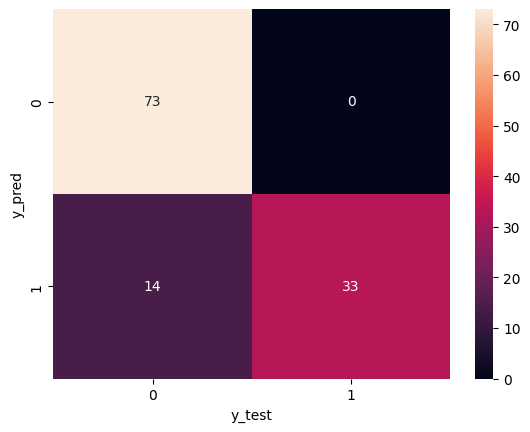

In [25]:
import seaborn as sns


sns.heatmap(confusion_matrix(y_test,y_pred), annot= True)

plt.xlabel('y_test')
plt.ylabel('y_pred')

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))


1.0
0.7021276595744681
0.825


## SVM

In [27]:
# Selecionando qual modelo eu quero treinar, o kernel iremos manter como linear,
# mas importante pesquisar sobre os outros tipos de kernel para o SVM (sigmoide, radial e polynomial)
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)


# Fazendo a previsão

y_pred = svm.predict(x_test)


y_pred = svm.predict(x_test)


##Avaliando o resultado

In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.7166666666666667
